In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')

# Loading Data

In [2]:
# Read CSVs
debtor_df = pd.read_csv("DebtorExtract.csv")
invoice_df = pd.read_csv("InvoiceExtract.csv")
payment_df = pd.read_csv("PaymentsExtract.csv")

In [3]:
dfs = {"debt": debtor_df, "invoice":invoice_df, "payment":payment_df}

In [4]:
def df_eda(df_dict):

    for df_name in df_dict:
        df = df_dict[df_name]
        print("Number of rows: " + str(len(df)))
        
        with pd.ExcelWriter(df_name + ".xlsx") as writer:
            for c in df.columns:
                #Print unique counts of columns
                print("Num unique col " + c + ': ' + str(df[c].nunique()))
                # Print description of column
                print("Description of column: " + c)
                desc = df[c].describe()
                desc.to_excel(writer, sheet_name = c)

In [5]:
print("Invoice unique customers:" + str(invoice_df["CustomerKey"].nunique()))
print("Invoice unique invoices:" + str(invoice_df["InvoiceKey"].nunique()))
print("Payment unique customers:" + str(payment_df["CustomerKey"].nunique()))
print("Payment unique invoices:" + str(payment_df["InvoiceKey"].nunique()))

Invoice unique customers:64782
Invoice unique invoices:367498
Payment unique customers:28535
Payment unique invoices:546365


In [6]:
inv_pay = pd.merge(invoice_df, payment_df, on = ['InvoiceKey', 'CustomerKey'])

In [7]:
inv_pay

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
0,197057173,16776992.0,1.0,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333,-645.66,2018-12-17,Barclays Multi
1,196559812,16837363.0,1.0,2018-01-02,2018-01-02,-139.37,0.0,JRN,2020-09-18 16:21:06.333,-139.37,2018-11-01,Barclays Multi
2,195300967,16724474.0,1.0,2018-01-03,2018-01-03,-88.50,0.0,JRN,2020-09-18 16:21:06.333,-88.50,2018-09-24,Barclays Multi
3,195519971,16745090.0,0.0,2018-01-03,2018-03-02,168.00,0.0,INV,2020-09-18 16:21:06.333,168.00,2018-11-23,Barclays Multi
4,196697217,16817529.0,1.0,2018-01-03,2018-01-03,-626.38,0.0,JRN,2020-09-18 16:21:06.333,-626.38,2019-12-17,Barclays Multi
...,...,...,...,...,...,...,...,...,...,...,...,...
133537,196217715,16840605.0,1.0,2018-11-27,2018-11-27,-31.43,0.0,CRN,2020-09-18 16:21:06.333,-31.43,2019-01-08,Barclays Multi
133538,197232843,16887190.0,0.0,2018-11-27,2018-12-27,2347.20,0.0,INV,2020-09-18 16:21:06.333,2347.20,2018-12-31,Barclays Multi
133539,196854318,16733572.0,0.0,2018-11-27,2018-12-27,864.00,0.0,INV,2020-09-18 16:21:06.333,864.00,2019-01-29,Barclays Multi
133540,195846431,16742289.0,0.0,2018-11-27,2018-12-27,1621.72,0.0,INV,2020-09-18 16:21:06.333,1621.72,2019-01-04,Barclays Multi


In [8]:
len(payment_df)

549748

In [9]:
invoice_df

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
0,197017110,16744809.0,1.0,2018-01-01,2018-08-31,-61589.70,-61589.70,CRN,2020-09-18 16:21:06.333
1,197188287,16744809.0,1.0,2018-01-01,2018-12-30,-2826.19,-2826.19,CRN,2020-09-18 16:21:06.333
2,197057183,16798371.0,1.0,2018-01-02,2018-01-02,-150.00,0.00,CSH,2020-09-18 16:21:06.333
3,195398038,16732292.0,0.0,2018-01-02,2018-02-01,485.04,0.00,INV,2020-09-18 16:21:06.333
4,197057173,16776992.0,1.0,2018-01-02,2018-01-02,-645.66,0.00,JRN,2020-09-18 16:21:06.333
...,...,...,...,...,...,...,...,...,...
367493,196626539,16745062.0,1.0,2018-11-27,2018-11-27,-48.20,0.00,CRN,2020-09-18 16:21:06.333
367494,197352537,16877735.0,1.0,2018-11-27,2018-11-27,-11.70,0.00,CSH,2020-09-18 16:21:06.333
367495,196866836,16745976.0,1.0,2018-11-27,2018-11-27,-29.00,0.00,CSH,2020-09-18 16:21:06.333
367496,196449430,16739410.0,1.0,2018-11-27,2018-11-27,-72.00,0.00,CSH,2020-09-18 16:21:06.333


In [10]:
payment_df.loc[payment_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,PaymentValue,PaymentDate,PaymentType
444086,197057173,16776992,-645.66,2018-12-17,Barclays Multi


In [11]:
invoice_df.loc[invoice_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
4,197057173,16776992.0,1.0,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333


# Data Types, number of unique values, intersection of keys

In [12]:
dfs['debt'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88099 entries, 0 to 88098
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     88099 non-null  int64 
 1    PostcodeOuter  88053 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
dfs['debt'].nunique()

CustomerKey       88099
 PostcodeOuter     2756
dtype: int64

In [14]:
dfs['invoice'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367498 entries, 0 to 367497
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   InvoiceKey                367498 non-null  int64  
 1   CustomerKey               367497 non-null  float64
 2   IsCreditInvoice           367497 non-null  float64
 3   RaisedDate                367497 non-null  object 
 4   DueDate                   367497 non-null  object 
 5   OriginalInvoiceAmount     367497 non-null  float64
 6   AmountOutstanding         367497 non-null  float64
 7   StatementTransactionType  367497 non-null  object 
 8   ExtractDate               367497 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 25.2+ MB


In [15]:
dfs['invoice'].nunique()

InvoiceKey                  367498
CustomerKey                  64782
IsCreditInvoice                  2
RaisedDate                     283
DueDate                        386
OriginalInvoiceAmount        89315
AmountOutstanding              350
StatementTransactionType         4
ExtractDate                      1
dtype: int64

In [16]:
dfs['payment'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549748 entries, 0 to 549747
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceKey    549748 non-null  int64  
 1   CustomerKey   549748 non-null  int64  
 2   PaymentValue  549748 non-null  float64
 3   PaymentDate   549748 non-null  object 
 4   PaymentType   549748 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 21.0+ MB


In [17]:
dfs['payment'].nunique()

InvoiceKey      546365
CustomerKey      28535
PaymentValue    153475
PaymentDate        518
PaymentType          2
dtype: int64

In [18]:
print('# of Common invoicekeys shared')
len(set(dfs['payment']['InvoiceKey']) & set(dfs['invoice']['InvoiceKey']))

# of Common invoicekeys shared


132870

# Visualizations

In [19]:
df = inv_pay
del df['ExtractDate']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133542 entries, 0 to 133541
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   InvoiceKey                133542 non-null  int64  
 1   CustomerKey               133542 non-null  float64
 2   IsCreditInvoice           133542 non-null  float64
 3   RaisedDate                133542 non-null  object 
 4   DueDate                   133542 non-null  object 
 5   OriginalInvoiceAmount     133542 non-null  float64
 6   AmountOutstanding         133542 non-null  float64
 7   StatementTransactionType  133542 non-null  object 
 8   PaymentValue              133542 non-null  float64
 9   PaymentDate               133542 non-null  object 
 10  PaymentType               133542 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 12.2+ MB


## Correlation

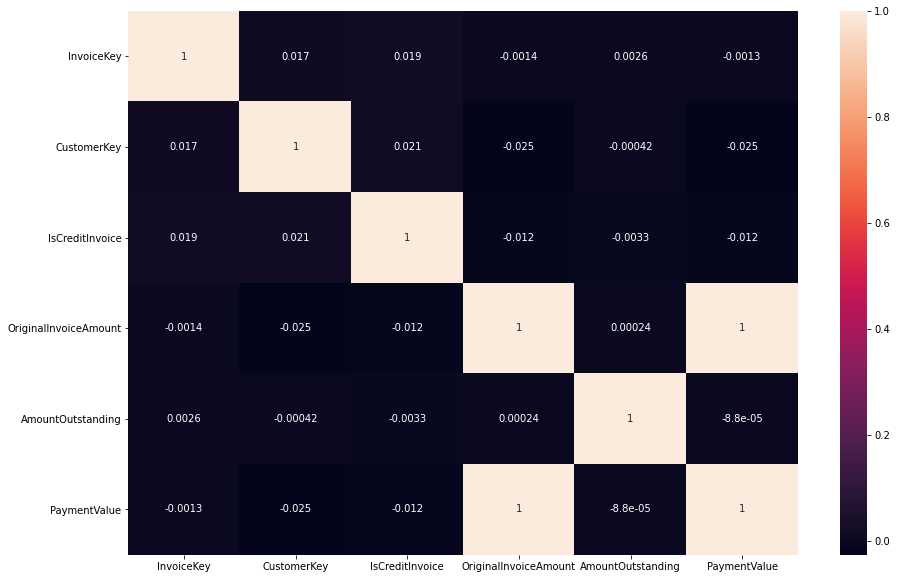

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

## Histograms

In [21]:
#df["StatementTransactionType"].nunique()
trans_types = df["StatementTransactionType"].value_counts()
trans_types

INV    130220
CRN      2766
JRN       380
CSH       176
Name: StatementTransactionType, dtype: int64

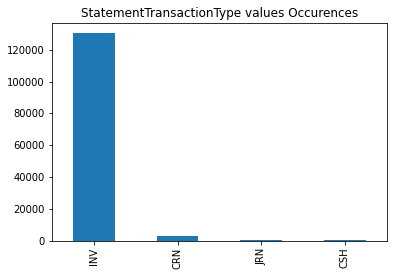

In [40]:
trans_types.plot(kind = "bar", title = "StatementTransactionType values Occurences")

In [23]:
credits_amount = df["IsCreditInvoice"].value_counts()
credits_amount

0.0    130297
1.0      3245
Name: IsCreditInvoice, dtype: int64

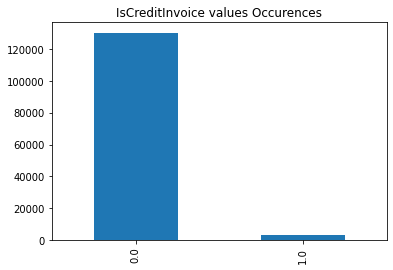

In [41]:
credits_amount.plot(kind = "bar",title = "IsCreditInvoice values Occurences")

In [25]:
pay_types = df["PaymentType"].value_counts()
pay_types

Barclays Multi    120542
CheckM8            13000
Name: PaymentType, dtype: int64

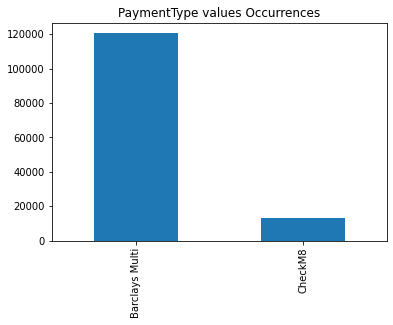

In [42]:
pay_types.plot(kind = "bar", title = "PaymentType values Occurrences")

# Box Plots

In [58]:
pay_dates = df["PaymentDate"].nunique()
pay_dates = df["PaymentDate"].value_counts()
pay_dates

2018-11-30    5088
2018-09-28    4680
2018-08-31    3755
2018-10-31    3497
2018-10-01    2537
              ... 
2019-08-30       1
2019-10-29       1
2020-01-27       1
2020-05-15       1
2020-04-22       1
Name: PaymentDate, Length: 380, dtype: int64

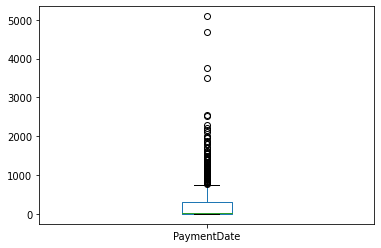

In [59]:
pay_dates.plot.box()

**Information per customer:**

In [111]:
#data points per customer
customers = df["CustomerKey"].value_counts().to_frame(name="occurences")
customers

,occurences
16745090.0,1437
16738849.0,1419
16745645.0,1020
16876991.0,771
16737254.0,748
...,...
16916752.0,1
16970798.0,1
16970989.0,1
16822124.0,1


In [112]:
#number of customers that only have one data point
customers[customers.occurences == 1].count()

occurences    2695
dtype: int64

In [113]:
#average values of continues variables per customers 
info_customer = df.groupby("CustomerKey").mean()
info_customer.drop(labels = "InvoiceKey", axis = 1) 

,IsCreditInvoice,OriginalInvoiceAmount,AmountOutstanding,PaymentValue
CustomerKey,,,,
16721154.0,0.0,69.216667,0.0,69.216667
16721167.0,0.0,189.082500,0.0,189.082500
16721173.0,0.0,359.970000,0.0,359.970000
16721203.0,0.0,64.440000,0.0,64.440000
16721207.0,0.0,471.413750,0.0,471.413750
...,...,...,...,...
16978037.0,0.0,55.080000,0.0,55.080000
16978053.0,0.0,1784.483333,0.0,1784.483333
16978071.0,0.0,130.535000,0.0,130.535000


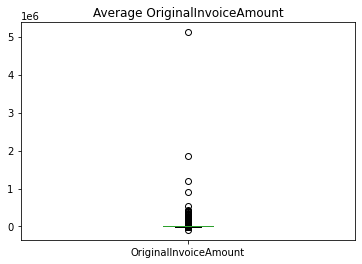

In [130]:
info_customer["OriginalInvoiceAmount"].plot.box(title = "Average OriginalInvoiceAmount")

In [115]:
info_customer[info_customer.OriginalInvoiceAmount > 5000000]

,InvoiceKey,IsCreditInvoice,OriginalInvoiceAmount,AmountOutstanding,PaymentValue
CustomerKey,,,,,
16773629.0,195805651.5,0.0,5113777.845,0.0,5113777.845


In [116]:
info_customer_out = info_customer.drop(index = 16773629.0)

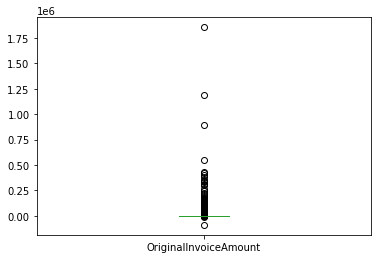

In [118]:
info_customer_out["OriginalInvoiceAmount"].plot.box()

In [127]:
outliers = (info_customer[info_customer.OriginalInvoiceAmount > 500000])
outliers.count()

InvoiceKey               5
IsCreditInvoice          5
OriginalInvoiceAmount    5
AmountOutstanding        5
PaymentValue             5
dtype: int64

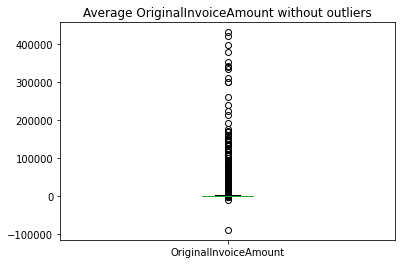

In [129]:
customers_outliers = info_customer.drop(index = outliers.index)
customers_outliers["OriginalInvoiceAmount"].plot.box(title = "Average OriginalInvoiceAmount without outliers")

In [66]:
#Customers with non-zero Amount Outstanding
info_customer[info_customer.AmountOutstanding != 0]

,InvoiceKey,IsCreditInvoice,OriginalInvoiceAmount,AmountOutstanding,PaymentValue
CustomerKey,,,,,
16737254.0,1.961430e+08,0.034759,346.591845,0.094251,341.342888
16787691.0,1.961830e+08,0.022147,602.766388,4.798739,442.708109
16859739.0,1.973512e+08,0.000000,2183.440000,441.970000,250.000000
16876019.0,1.958769e+08,0.000000,838.130000,338.130000,250.000000
16879763.0,1.963074e+08,0.016260,372.109973,-0.211057,373.016098
16885817.0,1.961957e+08,0.075368,125.088493,-0.428474,126.865735
16914697.0,1.967188e+08,0.000000,25544.573333,103.396667,2872.376667


In [71]:
#see how much the customers owe 
info_customer["InvoiceAmount-PaymentAmount"] = pd.Series(info_customer.OriginalInvoiceAmount - info_customer.PaymentValue,index = info_customer.index)
info_customer[info_customer.AmountOutstanding != 0]

,InvoiceKey,IsCreditInvoice,OriginalInvoiceAmount,AmountOutstanding,PaymentValue,InvoiceAmount-PaymentAmount
CustomerKey,,,,,,
16737254.0,1.961430e+08,0.034759,346.591845,0.094251,341.342888,5.248957
16787691.0,1.961830e+08,0.022147,602.766388,4.798739,442.708109,160.058279
16859739.0,1.973512e+08,0.000000,2183.440000,441.970000,250.000000,1933.440000
16876019.0,1.958769e+08,0.000000,838.130000,338.130000,250.000000,588.130000
16879763.0,1.963074e+08,0.016260,372.109973,-0.211057,373.016098,-0.906125
16885817.0,1.961957e+08,0.075368,125.088493,-0.428474,126.865735,-1.777243
16914697.0,1.967188e+08,0.000000,25544.573333,103.396667,2872.376667,22672.196667


In [198]:
customers_nonzero = info_customer[info_customer.AmountOutstanding != 0]
#customers_nonzero
customers.rename(columns={"index" :"CustomerKey"})
customers["occurences"].mean() #avg. number of transactions per customer
#pd.merge(customers, customers_nonzero, how = "inner",on = [customers_nonzero.CustomerKey])
#customers.intersection(customers_nonzero)

6.379191745485812

**Check data points per month**

In [151]:
#Making dates on DF into date type
#df.head()
df["RaisedDate"] = pd.to_datetime(df["RaisedDate"])
df["DueDate"] = pd.to_datetime(df["DueDate"])
df["PaymentDate"] = pd.to_datetime(df["PaymentDate"])


In [152]:
df.head()

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,PaymentValue,PaymentDate,PaymentType
0,197057173,16776992.0,1.0,2018-01-02,2018-01-02,-645.66,0.0,JRN,-645.66,2018-12-17,Barclays Multi
1,196559812,16837363.0,1.0,2018-01-02,2018-01-02,-139.37,0.0,JRN,-139.37,2018-11-01,Barclays Multi
2,195300967,16724474.0,1.0,2018-01-03,2018-01-03,-88.50,0.0,JRN,-88.50,2018-09-24,Barclays Multi
3,195519971,16745090.0,0.0,2018-01-03,2018-03-02,168.00,0.0,INV,168.00,2018-11-23,Barclays Multi
4,196697217,16817529.0,1.0,2018-01-03,2018-01-03,-626.38,0.0,JRN,-626.38,2019-12-17,Barclays Multi


In [172]:
#df[df.RaisedDate].month == "01"
value = df.loc[df["RaisedDate"].dt.month == 1].count()
value = value.to_frame(name = "count")
(value[value.index == "InvoiceKey"])["count"]

InvoiceKey    167
Name: count, dtype: int64

In [173]:
#counting the amount of invoices raised transactions per month
for i in range(12):
  print("Invoices raised on month {}:".format(i+1))
  value = df.loc[df["RaisedDate"].dt.month == i+1].count()
  value = value.to_frame(name = "count")
  print((value[value.index == "InvoiceKey"])["count"])

Invoices raised on month 1:
InvoiceKey    167
Name: count, dtype: int64
Invoices raised on month 2:
InvoiceKey    251
Name: count, dtype: int64
Invoices raised on month 3:
InvoiceKey    511
Name: count, dtype: int64
Invoices raised on month 4:
InvoiceKey    997
Name: count, dtype: int64
Invoices raised on month 5:
InvoiceKey    1881
Name: count, dtype: int64
Invoices raised on month 6:
InvoiceKey    6046
Name: count, dtype: int64
Invoices raised on month 7:
InvoiceKey    22371
Name: count, dtype: int64
Invoices raised on month 8:
InvoiceKey    30289
Name: count, dtype: int64
Invoices raised on month 9:
InvoiceKey    34678
Name: count, dtype: int64
Invoices raised on month 10:
InvoiceKey    31265
Name: count, dtype: int64
Invoices raised on month 11:
InvoiceKey    5086
Name: count, dtype: int64
Invoices raised on month 12:
InvoiceKey    0
Name: count, dtype: int64


In [182]:
#raised_months = pd.DataFrame(data = {"January":167,"February":251,"March":511,"April":997,"May":1881,"June":6046,"July":22371,"August":30289,"September":34678,"October":31265,"November":5086,"December":0})
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
raised_months = [167,251,511,997,1881,6046,22371,30289,34678,31265,5086,0]
d = {"Month": months,"InvoicesRaised":raised_months}
raised_months = pd.DataFrame(data = d)

In [183]:
raised_months

,Month,InvoicesRaised
0,January,167
1,February,251
2,March,511
3,April,997
4,May,1881
5,June,6046
6,July,22371
7,August,30289
8,September,34678
9,October,31265


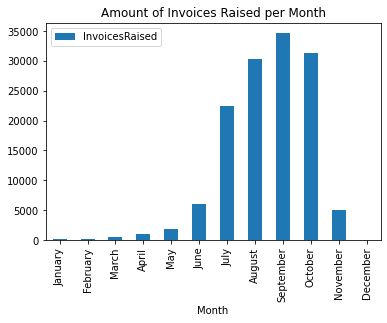

In [189]:
raised_months.plot.bar(x = "Month", y = "InvoicesRaised",title = "Amount of Invoices Raised per Month") 

In [191]:
#counting the amount of payments made per month
for i in range(12):
  print("Pyments made on month {}:".format(i+1))
  value = df.loc[df["PaymentDate"].dt.month == i+1].count()
  value = value.to_frame(name = "count")
  print((value[value.index == "InvoiceKey"])["count"])

Pyments made on month 1:
InvoiceKey    6898
Name: count, dtype: int64
Pyments made on month 2:
InvoiceKey    3649
Name: count, dtype: int64
Pyments made on month 3:
InvoiceKey    1155
Name: count, dtype: int64
Pyments made on month 4:
InvoiceKey    823
Name: count, dtype: int64
Pyments made on month 5:
InvoiceKey    444
Name: count, dtype: int64
Pyments made on month 6:
InvoiceKey    234
Name: count, dtype: int64
Pyments made on month 7:
InvoiceKey    194
Name: count, dtype: int64
Pyments made on month 8:
InvoiceKey    3856
Name: count, dtype: int64
Pyments made on month 9:
InvoiceKey    27940
Name: count, dtype: int64
Pyments made on month 10:
InvoiceKey    35449
Name: count, dtype: int64
Pyments made on month 11:
InvoiceKey    33247
Name: count, dtype: int64
Pyments made on month 12:
InvoiceKey    19653
Name: count, dtype: int64


In [194]:
payments_made = [6898,3649,1155,823,444,234,194,3856,27940,35449,33247,19653]
d = {"Month": months,"PaymentsMade":payments_made}
payments_made = pd.DataFrame(data = d)
payments_made

,Month,PaymentsMade
0,January,6898
1,February,3649
2,March,1155
3,April,823
4,May,444
5,June,234
6,July,194
7,August,3856
8,September,27940
9,October,35449


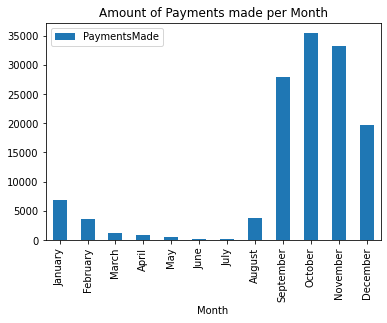

In [197]:
payments_made.plot.bar(x = "Month", y = "PaymentsMade",title = "Amount of Payments made per Month") 